In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
#import classification modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

Import Dataset

In [2]:
dataset = pd.read_csv('drug200.csv')

In [4]:
dataset.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [5]:
dataset.shape

(200, 6)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [7]:
dataset.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


Data Cleaning

In [8]:
dataset.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

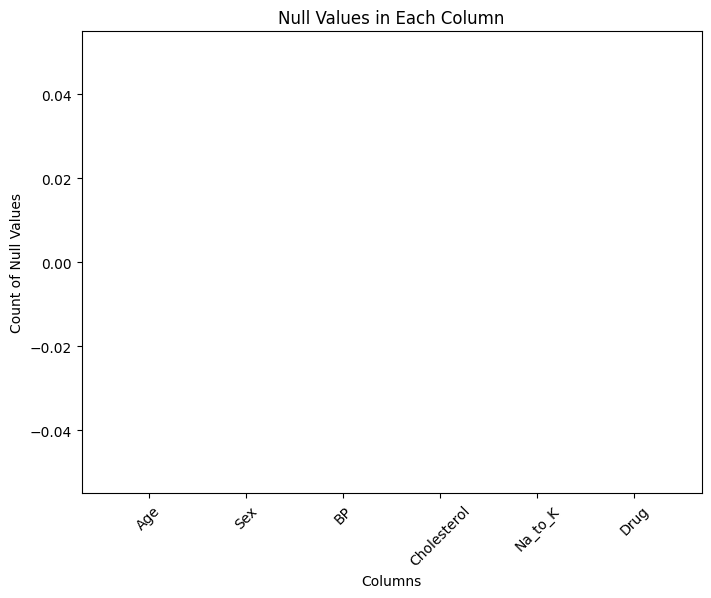

In [9]:
null_counts = dataset.isnull().sum()

# Plotting the null value counts
plt.figure(figsize=(8, 6))
plt.bar(null_counts.index, null_counts.values)
plt.xlabel('Columns')
plt.ylabel('Count of Null Values')
plt.title('Null Values in Each Column')
plt.xticks(rotation=45)
plt.show()

In [10]:
dataset.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

Visualisasi

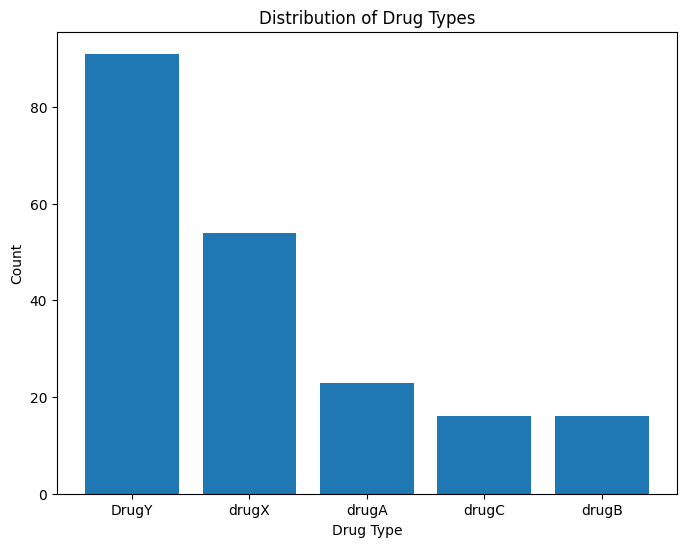

In [11]:
# Count the occurrences of each drug type
drug_counts = dataset['Drug'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(drug_counts.index, drug_counts.values)
plt.xlabel('Drug Type')
plt.ylabel('Count')
plt.title('Distribution of Drug Types')
plt.show()

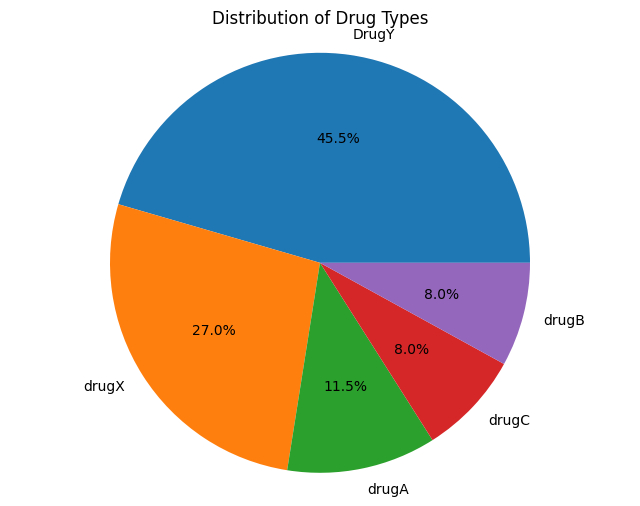

In [12]:
# Count the occurrences of each drug type
drug_counts = dataset['Drug'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(drug_counts.values, labels=drug_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Drug Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

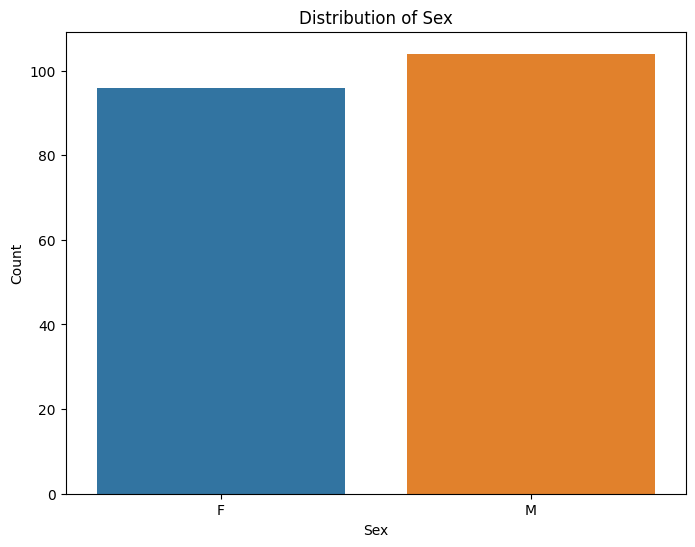

In [14]:
import seaborn as sns

# Create a count plot for sex
plt.figure(figsize=(8, 6))
sns.countplot(data=dataset, x='Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of Sex')
plt.show()

Data Encoding

In [15]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical variables
dataset['Sex'] = label_encoder.fit_transform(dataset['Sex'])
dataset['BP'] = label_encoder.fit_transform(dataset['BP'])
dataset['Cholesterol'] = label_encoder.fit_transform(dataset['Cholesterol'])
dataset['Drug'] = label_encoder.fit_transform(dataset['Drug'])

Split Data

In [16]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target variable (y)
X = dataset.drop('Drug', axis=1)  # Features (all columns except 'Drug')
y = dataset['Drug']  # Target variable ('Drug')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Classification Models

# DecisionTree

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score


dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)
cm_dt = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix:")
print(cm_dt)

#f1 score
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')
print("F1 Score:", f1_dt)

#precision score
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
print("Precision Score:", precision_dt)

#recall score
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
print("Recall Score:", recall_dt)

Confusion Matrix:
[[15  0  0  0  0]
 [ 0  6  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  5  0]
 [ 0  0  0  0 11]]
F1 Score: 1.0
Precision Score: 1.0
Recall Score: 1.0


# KNeighbors

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

#confusion matric
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

#F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

#precision score
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision Score:", precision)

# recall score
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall Score:", recall)

Accuracy: 0.775
Confusion Matrix:
[[15  0  0  0  0]
 [ 0  5  0  0  1]
 [ 0  0  2  0  1]
 [ 0  3  0  1  1]
 [ 0  1  2  0  8]]
F1 Score: 0.7595238095238096
Precision Score: 0.8208333333333332
Recall Score: 0.775


# GaussianNB

In [19]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score


nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
y_pred_nb = nb_classifier.predict(X_test)

# confusion matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)
print("Confusion Matrix:")
print(cm_nb)

# F1 score
f1_nb = f1_score(y_test, y_pred_nb, average='weighted')
print("F1 Score:", f1_nb)

# precision score
precision_nb = precision_score(y_test, y_pred_nb, average='weighted')
print("Precision Score:", precision_nb)

# recall score
recall_nb = recall_score(y_test, y_pred_nb, average='weighted')
print("Recall Score:", recall_nb)

Confusion Matrix:
[[12  1  1  1  0]
 [ 0  6  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  5  0]
 [ 0  0  0  0 11]]
F1 Score: 0.9247169497169498
Precision Score: 0.9389880952380952
Recall Score: 0.925


# SVC

In [20]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score


svc_classifier = SVC()
svc_classifier.fit(X_train, y_train)
y_pred_svc = svc_classifier.predict(X_test)

# confusion matrix
cm_svc = confusion_matrix(y_test, y_pred_svc)
print("Confusion Matrix:")
print(cm_svc)

# F1 score
f1_svc = f1_score(y_test, y_pred_svc, average='weighted')
print("F1 Score:", f1_svc)

# precision score
precision_svc = precision_score(y_test, y_pred_svc, average='weighted',zero_division=1)
print("Precision Score:", precision_svc)

# recall score
recall_svc = recall_score(y_test, y_pred_svc, average='weighted')
print("Recall Score:", recall_svc)

Confusion Matrix:
[[15  0  0  0  0]
 [ 0  0  0  0  6]
 [ 0  0  0  0  3]
 [ 1  0  0  0  4]
 [ 1  0  0  0 10]]
F1 Score: 0.5133272058823529
Precision Score: 0.8004475703324807
Recall Score: 0.625


### Conclusion

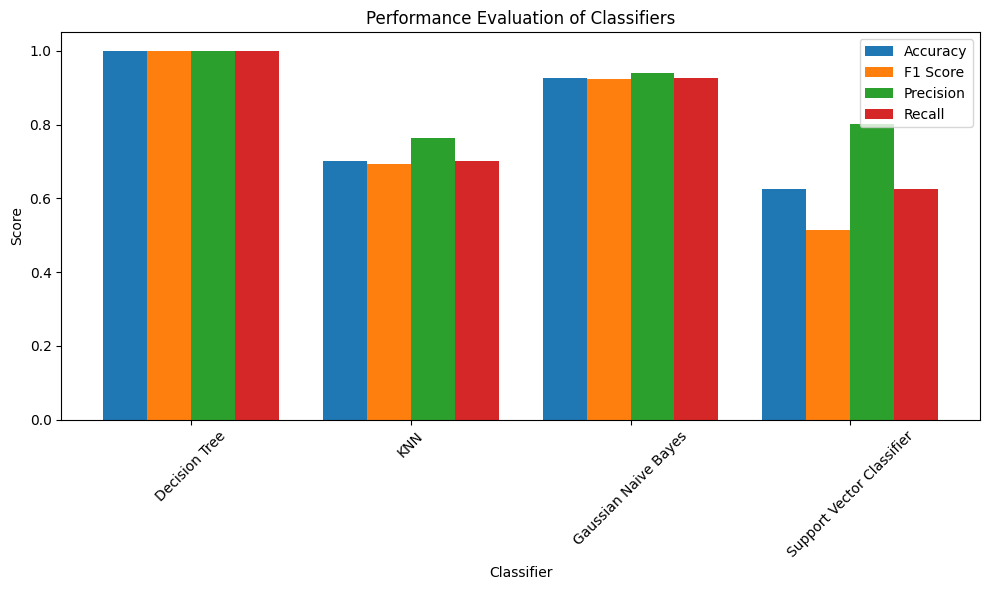

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Initialize the classifiers
dt_classifier = DecisionTreeClassifier()
knn_classifier = KNeighborsClassifier()
nb_classifier = GaussianNB()
svc_classifier = SVC()

classifiers = [dt_classifier, knn_classifier, nb_classifier, svc_classifier]
classifier_names = ['Decision Tree', 'KNN', 'Gaussian Naive Bayes', 'Support Vector Classifier']

# Lists to store evaluation metrics
accuracy_scores = []
f1_scores = []
precision_scores = []
recall_scores = []

# Evaluate each classifier and collect performance metrics
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted',zero_division=1)
    recall = recall_score(y_test, y_pred, average='weighted')

    accuracy_scores.append(accuracy)
    f1_scores.append(f1)
    precision_scores.append(precision)
    recall_scores.append(recall)

# Plotting the performance metrics
x = np.arange(len(classifier_names))
width = 0.2

plt.figure(figsize=(10, 6))
plt.bar(x, accuracy_scores, width, label='Accuracy')
plt.bar(x + width, f1_scores, width, label='F1 Score')
plt.bar(x + (2 * width), precision_scores, width, label='Precision')
plt.bar(x + (3 * width), recall_scores, width, label='Recall')

plt.xlabel('Classifier')
plt.ylabel('Score')
plt.title('Performance Evaluation of Classifiers')
plt.xticks(x + width * 1.5, classifier_names, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()